In [59]:
# This is a baseline code for the Employee Churn Modeling
# You are required to ammend this code based on related questions 

#calling respectives libraries to be used
import numpy as np
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier
# Import accuracy score 
from sklearn.metrics import accuracy_score
# Import train_test_split function
from sklearn.model_selection import train_test_split
# This part cover the neural network implementation of this problem
from sklearn import preprocessing
# Import pandas library for database manipulation
import pandas as pd
# Import matplotlib & seaborn for visual dislays
import matplotlib.pyplot as plt
import seaborn as sns
from os import system
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [60]:
# Load database (using Panda function)
# This dataset can be downloaded from Kaggle website - file name 'HR_comma_sep.csv
# database format = comma-separated value
# please put this file in the same folder of your python code
data=pd.read_csv('HR_comma_sep.csv')

In [40]:
# This part cover the visualization parts of the dataset
# data description
print(data.head())
print(data.info())
print(data.describe(include ='all'))

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Departments  \
0                   3              0     1                      0       sales   
1                   6              0     1                      0       sales   
2                   4              0     1                      0       sales   
3                   5              0     1                      0       sales   
4                   3              0     1                      0       sales   

   salary  
0     low  
1  mediu

In [41]:
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Missing Values in the Dataset:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64


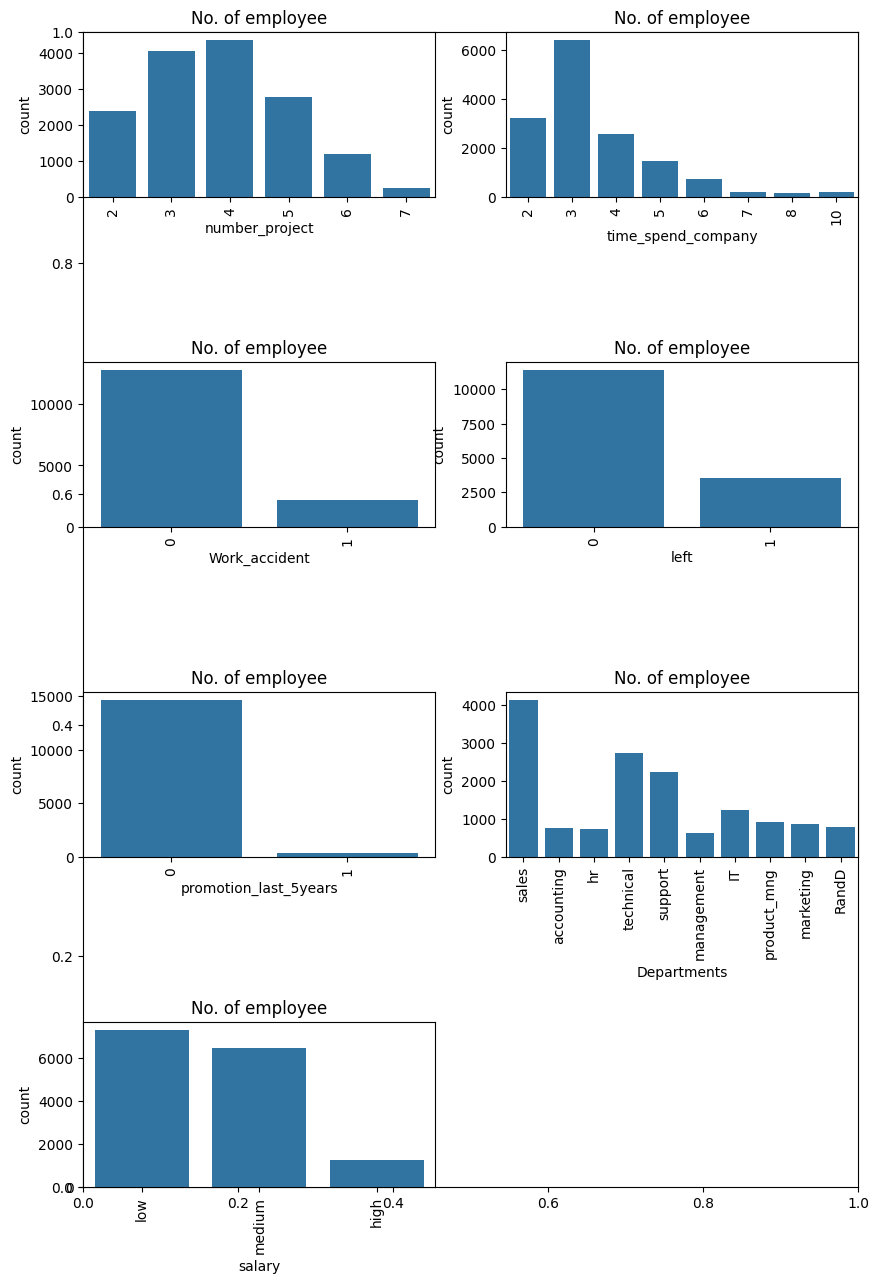

In [42]:
#multiple displays of the dataset
features=['number_project','time_spend_company','Work_accident','left','promotion_last_5years','Departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
     plt.subplot(4, 2, i+1)
     plt.subplots_adjust(hspace = 1.0)
     sns.countplot(x=j,data = data)
     plt.xticks(rotation=90)
     plt.title("No. of employee")
plt.show()


In [61]:
# Step 1: Encode categorical features (salary and Departments)
print("\nEncoding Categorical Features...")
le = preprocessing.LabelEncoder()
if data['salary'].dtype == 'object':  # Check if encoding is needed for salary
    data['salary'] = le.fit_transform(data['salary'])
if data['Departments'].dtype == 'object':  # Check if encoding is needed for Departments
    data['Departments'] = le.fit_transform(data['Departments'])
print("Categorical features encoded successfully.")



Encoding Categorical Features...
Categorical features encoded successfully.



Visualizing Feature Distributions...


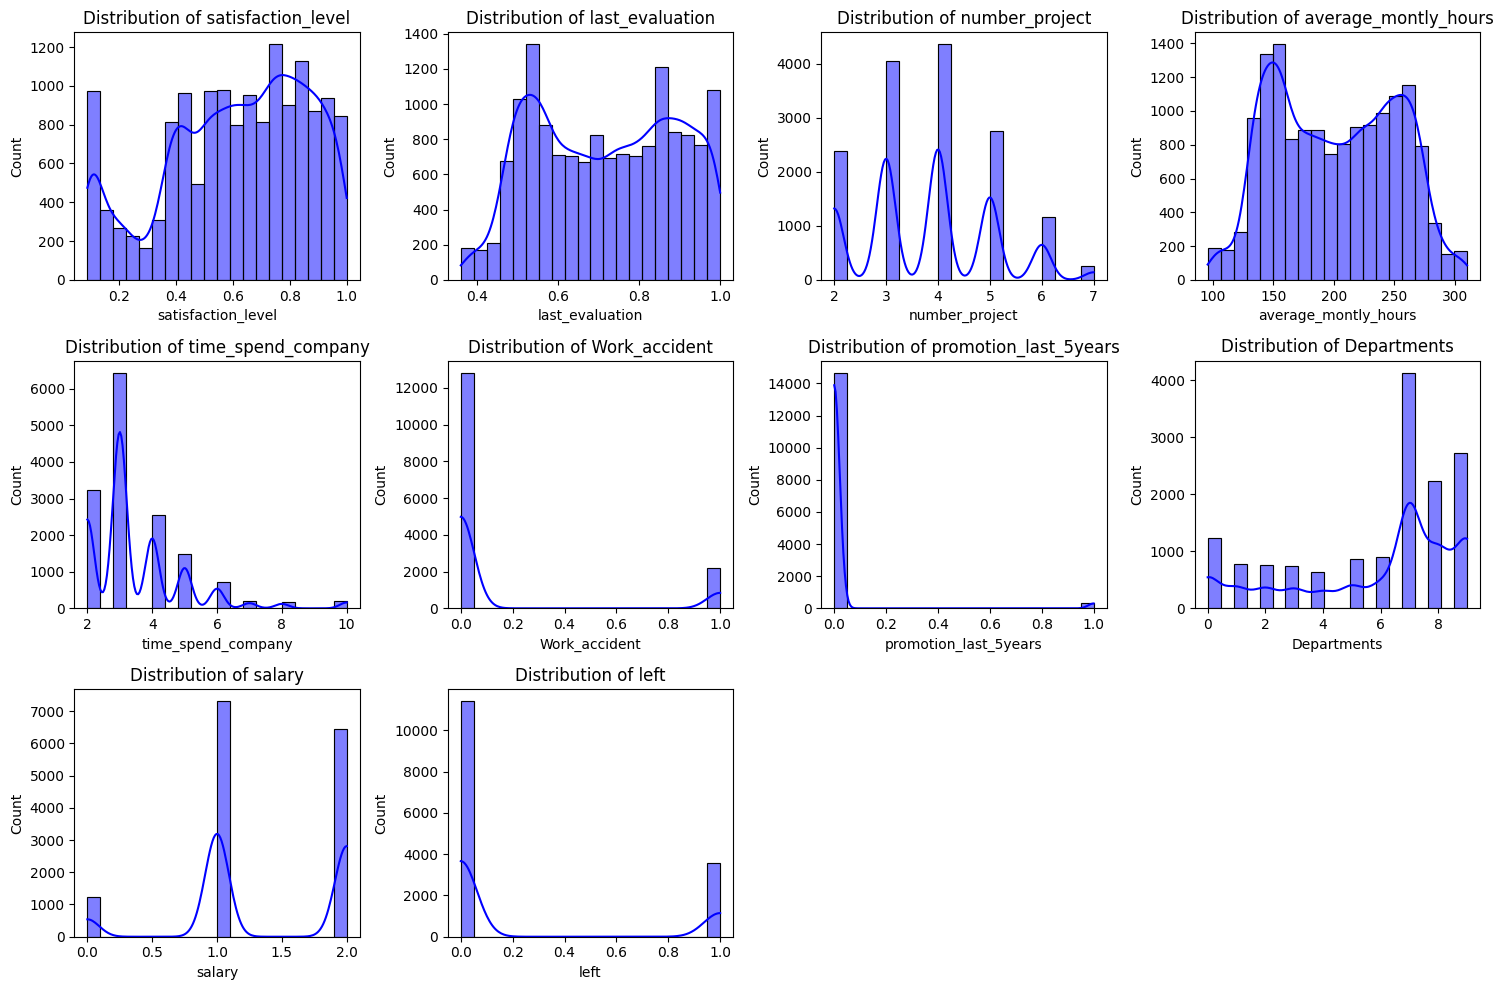

In [44]:
# Step 3: Visualize distributions of features
print("\nVisualizing Feature Distributions...")
features = ['satisfaction_level', 'last_evaluation', 'number_project',
            'average_montly_hours', 'time_spend_company', 'Work_accident', 
            'promotion_last_5years', 'Departments', 'salary', 'left']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[feature], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

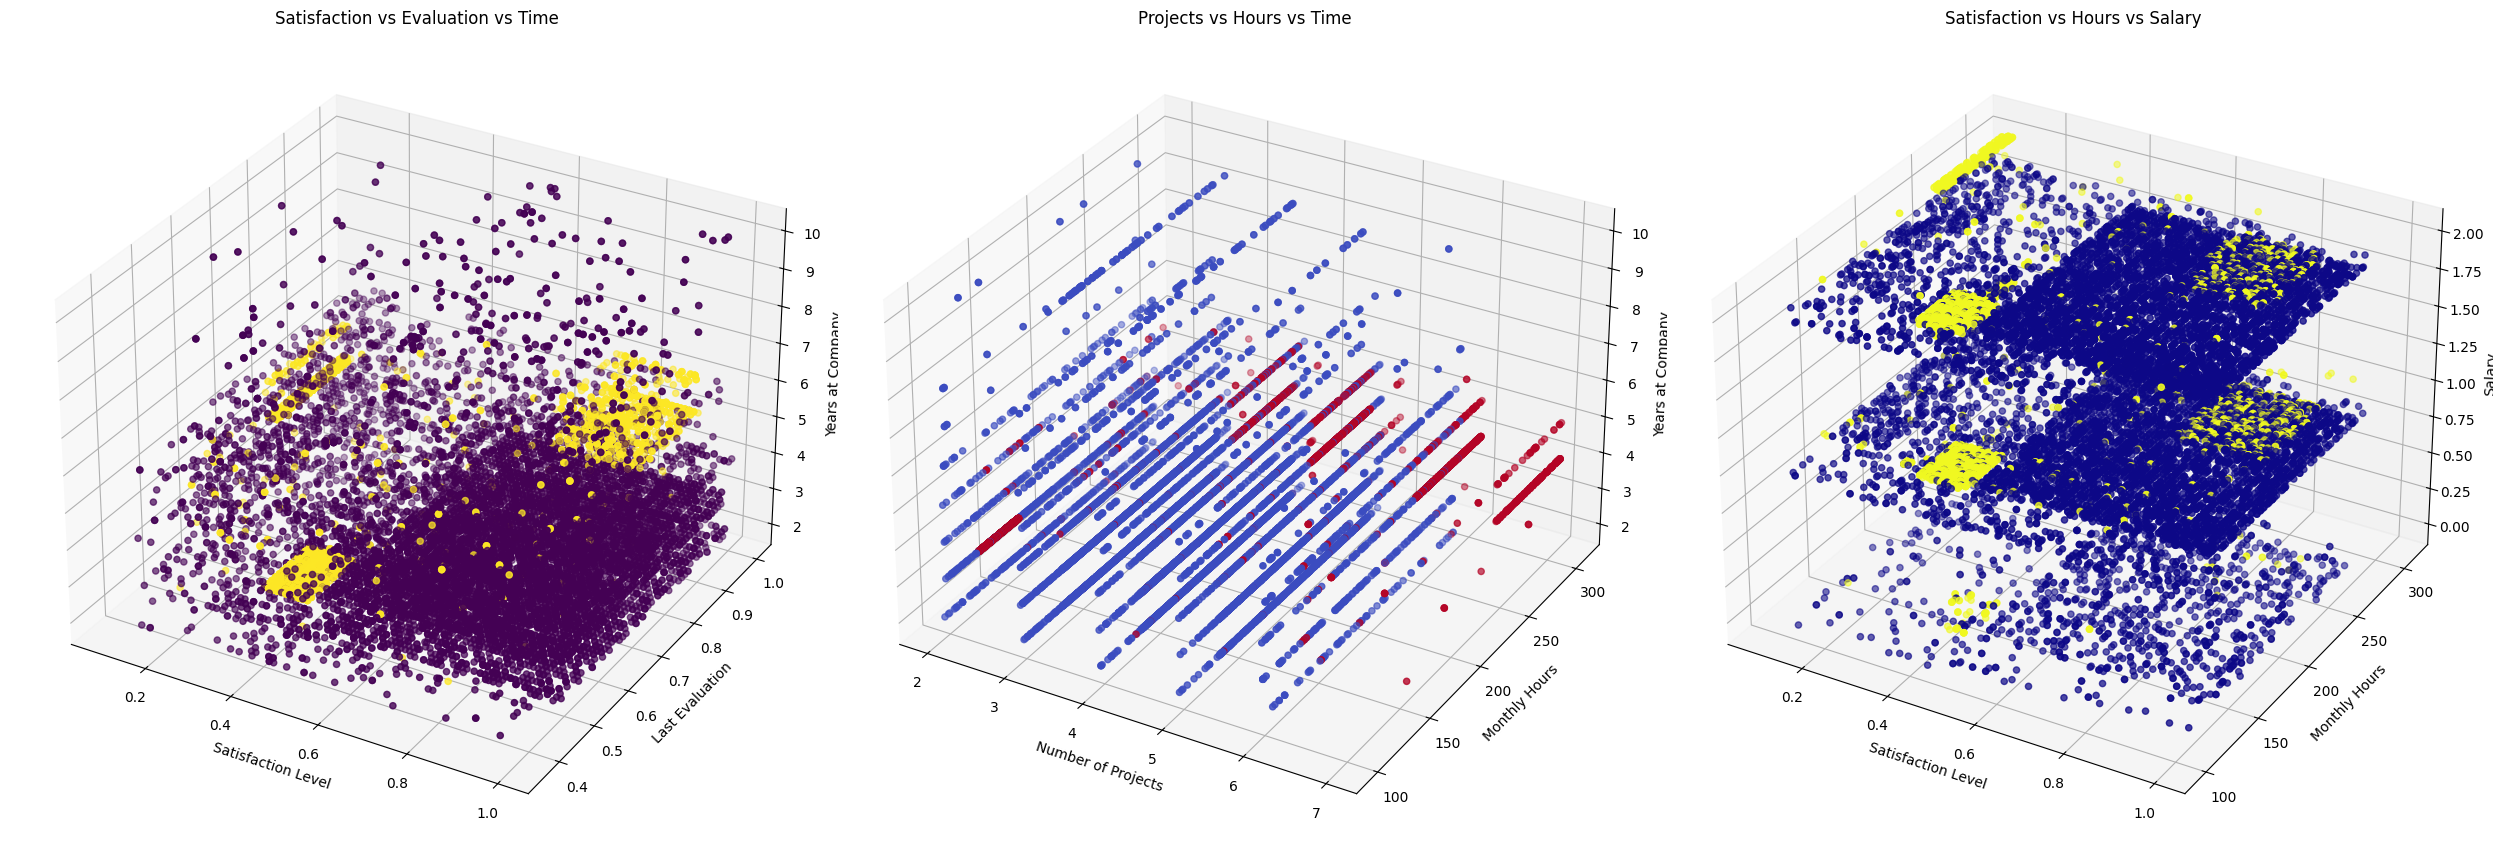

In [45]:
# Creating 3D scatterplots
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25, 15))

# 3D scatter plot 1
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(data['satisfaction_level'], data['last_evaluation'], data['time_spend_company'], c=data['left'], cmap='viridis')
ax1.set_xlabel('Satisfaction Level')
ax1.set_ylabel('Last Evaluation')
ax1.set_zlabel('Years at Company')
ax1.set_title('Satisfaction vs Evaluation vs Time')

# 3D scatter plot 2
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(data['number_project'], data['average_montly_hours'], data['time_spend_company'], c=data['left'], cmap='coolwarm')
ax2.set_xlabel('Number of Projects')
ax2.set_ylabel('Monthly Hours')
ax2.set_zlabel('Years at Company')
ax2.set_title('Projects vs Hours vs Time')

# 3D scatter plot 3
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(data['satisfaction_level'], data['average_montly_hours'], data['salary'], c=data['left'], cmap='plasma')
ax3.set_xlabel('Satisfaction Level')
ax3.set_ylabel('Monthly Hours')
ax3.set_zlabel('Salary')
ax3.set_title('Satisfaction vs Hours vs Salary')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10576\3377839661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['left'], y=data[feature], ax=axes[i], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_10576\3377839661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['left'], y=data[feature], ax=axes[i], palette="Set2")
C:\Users\User\AppData\Local\Temp\ipykernel_10576\3377839661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['left'], y=data[feature], ax=axes[i], palette="Set2")
C:\Users\User\AppData\Local\

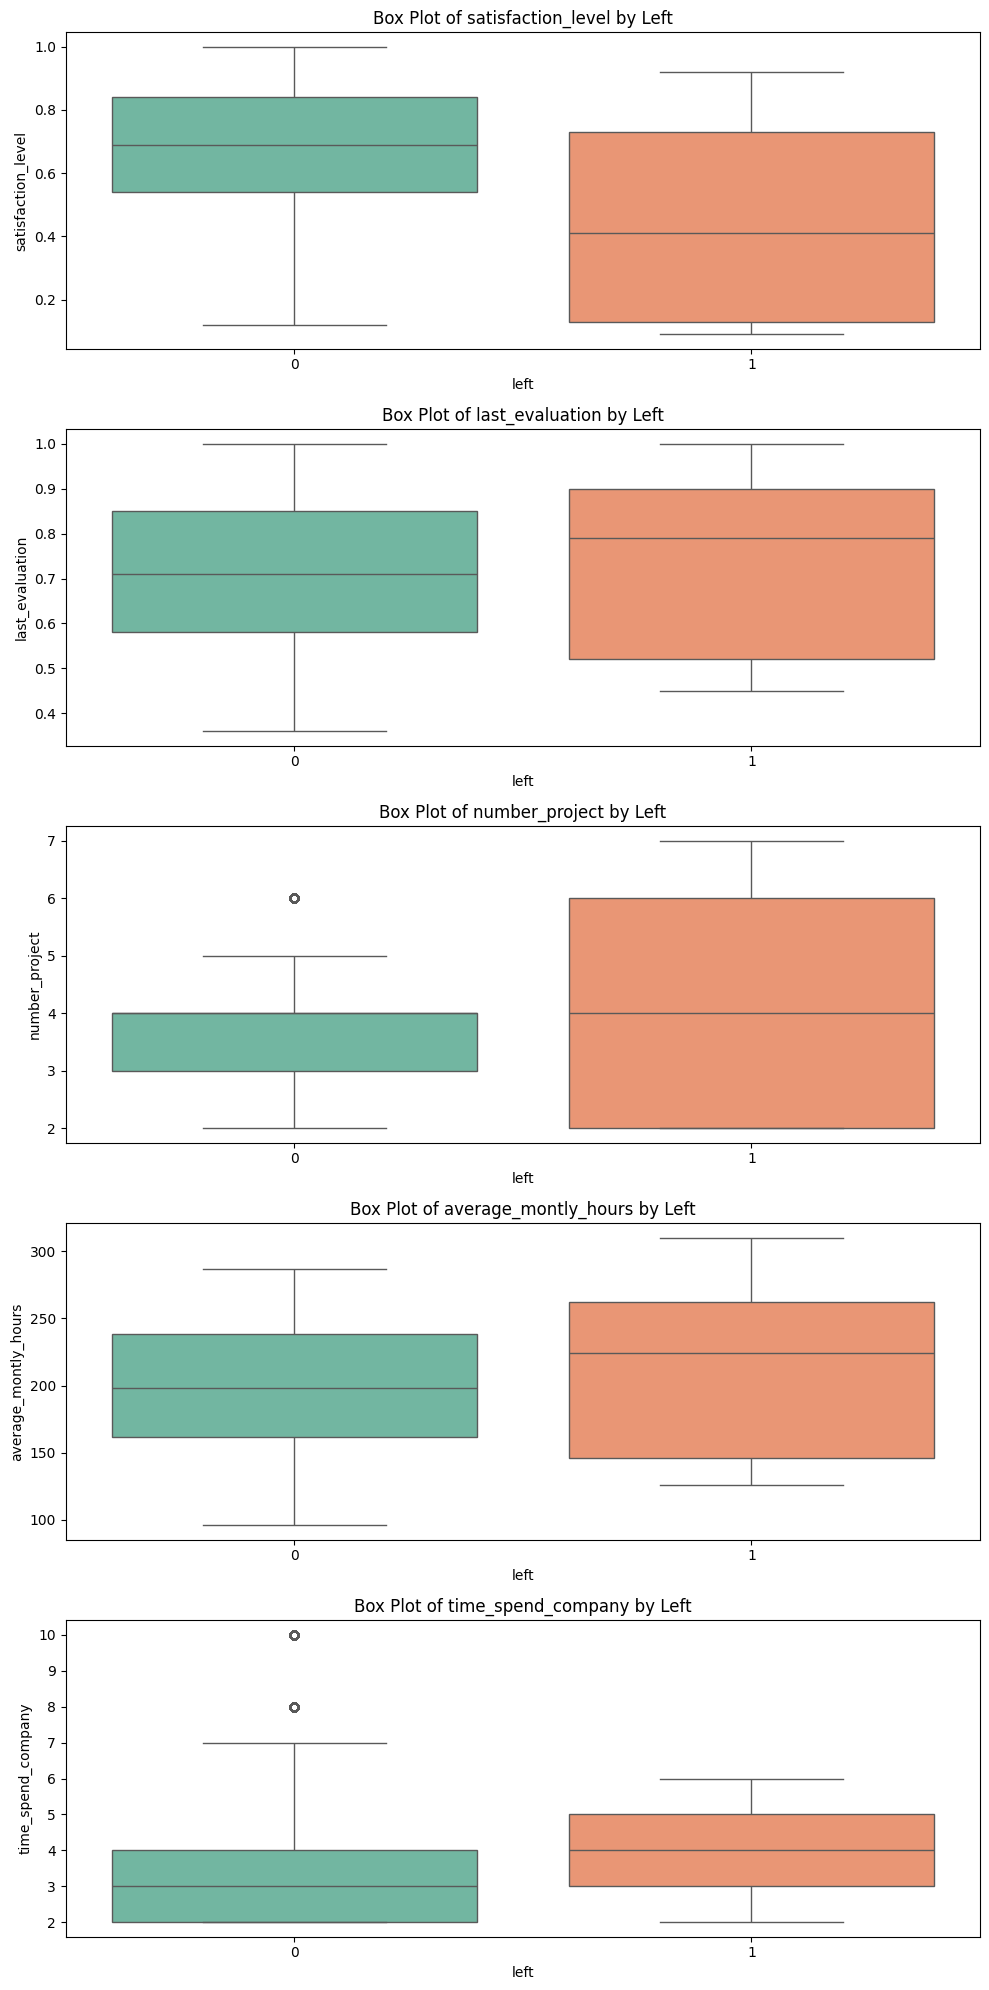

In [46]:
# Box plots for numeric features
numeric_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
fig, axes = plt.subplots(len(numeric_features), 1, figsize=(10, 20))

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=data['left'], y=data[feature], ax=axes[i], palette="Set2")
    axes[i].set_title(f"Box Plot of {feature} by Left")

plt.tight_layout()
plt.show()

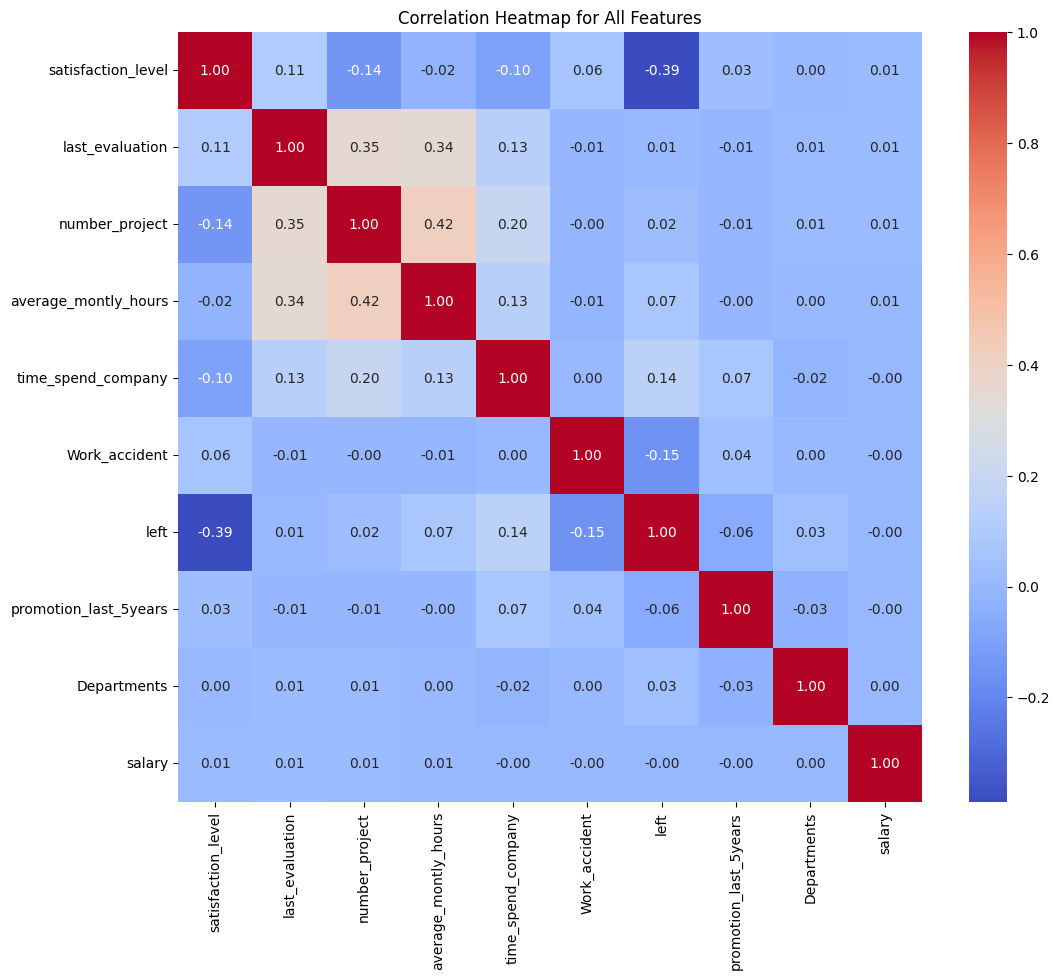

In [47]:
# Correlation heatmap for all features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap for All Features")
plt.show()

In [62]:
# Feature selection
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours',
          'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Departments', 'salary']]
y = data['left']

In [63]:

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [64]:
# Compare train-test splits
splits = [(0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9,0.1)]
results = {}
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    clf = MLPClassifier(hidden_layer_sizes=(8, 5), max_iter=2000, activation='relu',
                        solver='adam', random_state=5, tol=0.001, momentum=0.9, learning_rate_init=0.01)
    # clf = MLPClassifier(hidden_layer_sizes=(8, 5),max_iter=2000,random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[f"Train: {train_size}, Test: {test_size}"] = acc

print(results)

# Select the best split
best_split = max(results, key=results.get)
best_train_size, best_test_size = [float(x.split(': ')[1]) for x in best_split.split(', ')]
print(f"Best Split: {best_split} with Accuracy: {results[best_split]:.3f}")

{'Train: 0.6, Test: 0.4': 0.9655, 'Train: 0.7, Test: 0.3': 0.9646666666666667, 'Train: 0.8, Test: 0.2': 0.964, 'Train: 0.9, Test: 0.1': 0.972}
Best Split: Train: 0.9, Test: 0.1 with Accuracy: 0.972


In [65]:
# Using the best train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=best_test_size, random_state=42)


In [66]:
# Baseline model
clf_baseline = MLPClassifier(hidden_layer_sizes=(8, 5), max_iter=2000, activation='relu',
                              solver='adam', random_state=5, tol=0.001, momentum=0.9,
                              learning_rate_init=0.01, verbose=True)
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)
print('Baseline Model Accuracy: %.3f%%' % (accuracy_score(y_test, y_pred_baseline) * 100))

print("Classification Report:\n", classification_report(y_test, y_pred_baseline))

Iteration 1, loss = 0.42860446
Iteration 2, loss = 0.21337569
Iteration 3, loss = 0.16492125
Iteration 4, loss = 0.15427095
Iteration 5, loss = 0.14786421
Iteration 6, loss = 0.14097933
Iteration 7, loss = 0.13832729
Iteration 8, loss = 0.13631818
Iteration 9, loss = 0.13407489
Iteration 10, loss = 0.13089688
Iteration 11, loss = 0.13005275
Iteration 12, loss = 0.12771777
Iteration 13, loss = 0.12540746
Iteration 14, loss = 0.12413806
Iteration 15, loss = 0.12530507
Iteration 16, loss = 0.12130296
Iteration 17, loss = 0.12146723
Iteration 18, loss = 0.12036807
Iteration 19, loss = 0.11984131
Iteration 20, loss = 0.12023106
Iteration 21, loss = 0.12064086
Iteration 22, loss = 0.11988406
Iteration 23, loss = 0.11888675
Iteration 24, loss = 0.11762917
Iteration 25, loss = 0.11675973
Iteration 26, loss = 0.11621808
Iteration 27, loss = 0.11614217
Iteration 28, loss = 0.11619610
Iteration 29, loss = 0.11516139
Iteration 30, loss = 0.11586287
Iteration 31, loss = 0.11500584
Iteration 32, los


Testing Configuration 1: {'hidden_layer_sizes': (5, 2), 'max_iter': 500, 'momentum': 0.5, 'tol': 0.01, 'learning_rate_init': 0.1}
Accuracy for Configuration 1: 77.000%
Classification Report for Configuration 1:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1155
           1       0.00      0.00      0.00       345

    accuracy                           0.77      1500
   macro avg       0.39      0.50      0.44      1500
weighted avg       0.59      0.77      0.67      1500



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

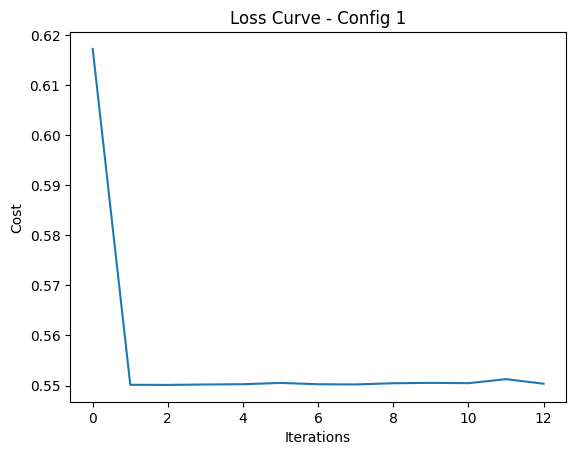


Testing Configuration 2: {'hidden_layer_sizes': (12, 6), 'max_iter': 2500, 'momentum': 0.9, 'tol': 0.0001, 'learning_rate_init': 0.001}
Accuracy for Configuration 2: 96.867%
Classification Report for Configuration 2:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1155
           1       0.96      0.90      0.93       345

    accuracy                           0.97      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.97      0.97      0.97      1500



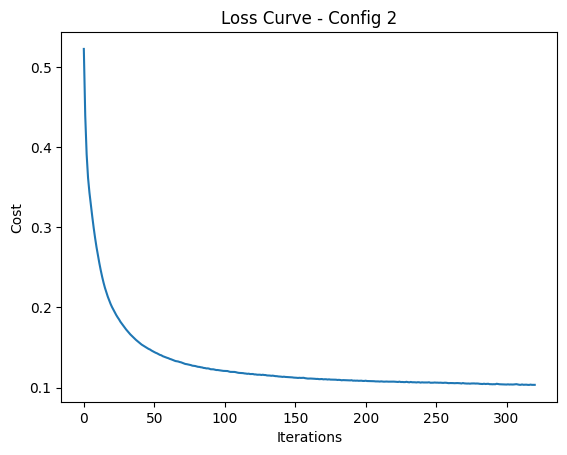


Testing Configuration 3: {'hidden_layer_sizes': (20, 20), 'max_iter': 3000, 'momentum': 0.7, 'tol': 0.0005, 'learning_rate_init': 0.005}
Accuracy for Configuration 3: 97.533%
Classification Report for Configuration 3:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1155
           1       0.98      0.91      0.94       345

    accuracy                           0.98      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.98      0.98      0.98      1500



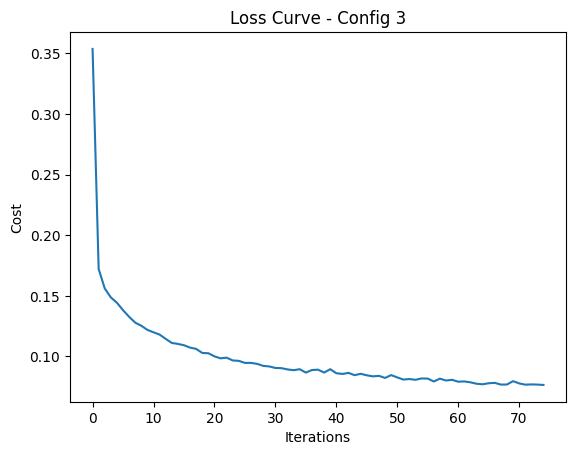

In [67]:
# Testing different configurations
configurations = [
    {'hidden_layer_sizes': (5, 2), 'max_iter': 500, 'momentum': 0.5, 'tol': 0.01, 'learning_rate_init': 0.1},
    {'hidden_layer_sizes': (12, 6), 'max_iter': 2500, 'momentum': 0.9, 'tol': 0.0001, 'learning_rate_init': 0.001},
    {'hidden_layer_sizes': (20, 20), 'max_iter': 3000, 'momentum': 0.7, 'tol': 0.0005, 'learning_rate_init': 0.005}
]

# Evaluate configurations
for i, config in enumerate(configurations):
    print(f"\nTesting Configuration {i + 1}: {config}")
    clf = MLPClassifier(**config, activation='relu', solver='adam', random_state=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy for Configuration {i + 1}: {acc * 100:.3f}%")
    
    # Display classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for Configuration {i + 1}:\n{report}")
    
    # Plot loss curve
    plt.plot(clf.loss_curve_)
    plt.title(f"Loss Curve - Config {i + 1}")
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()


In [58]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'alpha': [0.001, 0.01, 0.1],
    'max_iter': [100, 500, 1000],
    'learning_rate': ['constant', 'adaptive']
}

clf_grid = GridSearchCV(MLPClassifier(activation='relu', solver='adam', random_state=5),
                        param_grid, cv=3, verbose=2, n_jobs=-1)
clf_grid.fit(X_train, y_train)

# Best Model from GridSearchCV
best_model = clf_grid.best_estimator_



Fitting 3 folds for each of 54 candidates, totalling 162 fits


In [ ]:
# Best Parameters and Accuracy
print("Best Parameters from GridSearchCV:", clf_grid.best_params_)
y_pred_grid = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_grid)
print(f"GridSearchCV Optimized Accuracy: {optimized_accuracy * 100:.3f}%")

# Predict on training and testing datasets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("The model might be overfitting, as the training accuracy is significantly higher than the testing accuracy.")
else:
    print("The model does not appear to be overfitting.")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Classification report
ypred_grid = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, ypred_grid))

Best Parameters from GridSearchCV: {'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 500}
GridSearchCV Optimized Accuracy: 98.067%
Training Accuracy: 0.996
Testing Accuracy: 0.981
The model does not appear to be overfitting.
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1155
           1       0.96      0.95      0.96       345

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.98      0.98      0.98      1500

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1155
           1       0.96      0.95      0.96       345

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.97      1500
weighted avg       0.98      0.98      0.98      1500



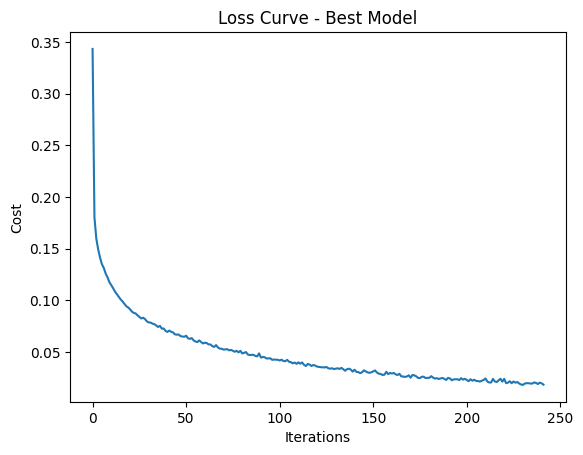

In [ ]:
# Plot Loss Curve for Best Model
plt.plot(best_model.loss_curve_)
plt.title("Loss Curve - Best Model")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [20]:
import joblib

# Assuming `best_model` is your trained MLP model
joblib.dump(best_model, 'best_mlp_model5.pkl')
joblib.dump(scaler, 'scaler5.pkl')

['scaler5.pkl']

In [21]:
import numpy as np
import joblib

# Load the saved scaler and model
scaler = joblib.load('scaler5.pkl')
clf = joblib.load('best_mlp_model5.pkl')

# Simulated user input 1: Likely to stay
input_1 = np.array([
    0.8,  # satisfaction_level
    0.9,  # last_evaluation
    5,    # number_project
    220,  # average_montly_hours
    3,    # time_spend_company
    0,    # Work_accident
    0,    # promotion_last_5years
    4,    # Departments (technical)
    2     # salary (medium)
]).reshape(1, -1)

# Simulated user input 2: Likely to leave
input_2 = np.array([
    0.2,  # satisfaction_level
    0.5,  # last_evaluation
    2,    # number_project
    150,  # average_montly_hours
    5,    # time_spend_company
    0,    # Work_accident
    0,    # promotion_last_5years
    3,    # Departments (HR)
    1     # salary (low)
]).reshape(1, -1)

# Scale the inputs
input_1_scaled = scaler.transform(input_1)
input_2_scaled = scaler.transform(input_2)

# Make predictions
predict_1 = clf.predict(input_1_scaled)
predict_2 = clf.predict(input_2_scaled)

# Display results
result_1 = "Stay" if predict_1 == [0] else "Leave"
result_2 = "Stay" if predict_2 == [0] else "Leave"

print(f"Simulated Input 1: Likely to {result_1}")
print(f"Simulated Input 2: Likely to {result_2}")


Simulated Input 1: Likely to Stay
Simulated Input 2: Likely to Stay


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Analyze prediction probabilities for the two simulated inputs
probabilities_1 = clf.predict_proba(input_1_scaled)
probabilities_2 = clf.predict_proba(input_2_scaled)

# Display prediction probabilities
print(f"Simulated Input 1 Probabilities: Stay={probabilities_1[0][0]:.3f}, Leave={probabilities_1[0][1]:.3f}")
print(f"Simulated Input 2 Probabilities: Stay={probabilities_2[0][0]:.3f}, Leave={probabilities_2[0][1]:.3f}")


Simulated Input 1 Probabilities: Stay=1.000, Leave=0.000
Simulated Input 2 Probabilities: Stay=1.000, Leave=0.000


Balancing the dataset to reduce bias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import joblib

# Load dataset
data = pd.read_csv('HR_comma_sep.csv')

# Encode categorical features
data['Departments'] = data['Departments'].replace({
    'sales': 1, 'accounting': 2, 'hr': 3, 'technical': 4, 'support': 5,
    'management': 6, 'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10
})
data['salary'] = data['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

# Features and target
features = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company', 'Work_accident',
    'promotion_last_5years', 'Departments', 'salary'
]
target = 'left'

# Balance the dataset
data_class_0 = data[data['left'] == 0].sample(3000, random_state=42)
data_class_1 = data[data['left'] == 1].sample(3000, random_state=42)
balanced_data = pd.concat([data_class_0, data_class_1])

# Split into features and target
X = balanced_data[features]
y = balanced_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create model object for a neural network classifier
clf = MLPClassifier(
    hidden_layer_sizes=(100, 100), max_iter=500, activation='relu',
    alpha=0.001, solver='adam', random_state=5, tol=0.001, momentum=0.9,
    verbose=True, learning_rate='constant', learning_rate_init=0.01,
    early_stopping=True
)

# Fit scaled data onto the model
clf.fit(X_train_scaled, y_train)

# # Make prediction on test dataset
# y_pred = clf.predict(X_test_scaled)

# Predict on training and testing datasets
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display results
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("The model might be overfitting, as the training accuracy is significantly higher than the testing accuracy.")
else:
    print("The model does not appear to be overfitting.")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Save the model and scaler
joblib.dump(clf, 'best_mlp_model_scaled6.pkl')
joblib.dump(scaler, 'scaler6.pkl')


Iteration 1, loss = 0.30723917
Validation score: 0.918519
Iteration 2, loss = 0.21349255
Validation score: 0.950000
Iteration 3, loss = 0.17902780
Validation score: 0.951852
Iteration 4, loss = 0.17318475
Validation score: 0.948148
Iteration 5, loss = 0.15999780
Validation score: 0.950000
Iteration 6, loss = 0.14485570
Validation score: 0.951852
Iteration 7, loss = 0.13817397
Validation score: 0.953704
Iteration 8, loss = 0.14078816
Validation score: 0.946296
Iteration 9, loss = 0.12747115
Validation score: 0.953704
Iteration 10, loss = 0.12724695
Validation score: 0.955556
Iteration 11, loss = 0.12659197
Validation score: 0.951852
Iteration 12, loss = 0.11605021
Validation score: 0.950000
Iteration 13, loss = 0.11564505
Validation score: 0.953704
Iteration 14, loss = 0.11835897
Validation score: 0.951852
Iteration 15, loss = 0.10909632
Validation score: 0.950000
Iteration 16, loss = 0.10272479
Validation score: 0.957407
Iteration 17, loss = 0.10267901
Validation score: 0.944444
Iterat

['scaler6.pkl']

In [ ]:
import numpy as np
import joblib

# Load the saved scaler and model
scaler = joblib.load('scaler6.pkl')
clf = joblib.load('best_mlp_model_scaled6.pkl')

# Simulated user input 1: Likely to stay
input_1 = np.array([
    0.8,  # satisfaction_level
    0.9,  # last_evaluation
    5,    # number_project
    220,  # average_montly_hours
    3,    # time_spend_company
    0,    # Work_accident
    0,    # promotion_last_5years
    4,    # Departments (technical)
    2     # salary (medium)
]).reshape(1, -1)

# Simulated user input 2: Likely to leave
input_2 = np.array([
    0.2,  # satisfaction_level
    0.5,  # last_evaluation
    2,    # number_project
    150,  # average_montly_hours
    5,    # time_spend_company
    0,    # Work_accident
    0,    # promotion_last_5years
    3,    # Departments (HR)
    1     # salary (low)
]).reshape(1, -1)

# Scale the inputs
input_1_scaled = scaler.transform(input_1)
input_2_scaled = scaler.transform(input_2)

# Make predictions
predict_1 = clf.predict(input_1_scaled)
predict_2 = clf.predict(input_2_scaled)

# Display results
result_1 = "Stay" if predict_1 == [0] else "Leave"
result_2 = "Stay" if predict_2 == [0] else "Leave"

print(f"Simulated Input 1: Likely to {result_1}")
print(f"Simulated Input 2: Likely to {result_2}")


Simulated Input 1: Likely to Stay
Simulated Input 2: Likely to Leave


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
# Analyze prediction probabilities for the two simulated inputs
probabilities_1 = clf.predict_proba(input_1_scaled)
probabilities_2 = clf.predict_proba(input_2_scaled)

# Display prediction probabilities
print(f"Simulated Input 1 Probabilities: Stay={probabilities_1[0][0]:.3f}, Leave={probabilities_1[0][1]:.3f}")
print(f"Simulated Input 2 Probabilities: Stay={probabilities_2[0][0]:.3f}, Leave={probabilities_2[0][1]:.3f}")


Simulated Input 1 Probabilities: Stay=0.998, Leave=0.002
Simulated Input 2 Probabilities: Stay=0.349, Leave=0.651
